<b> Healthcare.

Project 2

DESCRIPTION
Problem Statement

    NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
    The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
    Build a model to accurately predict whether the patients in the dataset have diabetes or not.
</b>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('Health_Care_Dataset\Healthcare - Diabetes/health_care_diabetes.csv');

In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

<h2>Project Task: Week 1</h2>

Data Exploration:

<b>1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:</b>

    • Glucose

    • BloodPressure

    • SkinThickness

    • Insulin

    • BMI
    
    <br/>
<b>2. Visually explore these variables using histograms. Treat the missing values accordingly.</b>

In [10]:
#Perform descriptive analysis.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Glucose , BloodPressure,SkinThickness,BMI,Insulin can't be zero , hence having zero means missing values are present

In [11]:
#creating an array which should not be zero
treat_columns = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

In [12]:
#Lets check zeroes are present in above mentioned columns
for treat_column in treat_columns:
    print(f"No of zeros present in {treat_column} are {df[df[treat_column] == 0].value_counts().sum()}")

No of zeros present in Glucose are 5
No of zeros present in BloodPressure are 35
No of zeros present in SkinThickness are 227
No of zeros present in BMI are 11
No of zeros present in Insulin are 374


In [13]:
#imputing zero with a mean
#from sklearn.impute import SimpleImputer
#mean_imputer = SimpleImputer(missing_values=0,strategy='mean')
#mean_imputer = mean_imputer.fit(df[treat_columns])
#df[treat_columns] = mean_imputer.transform(df[treat_columns])

In [14]:
#Change 0 to np.Nan
df[treat_columns] = df[treat_columns].replace([0],np.nan)

In [15]:
#Lets check after imputing how many zeroes are present
for treat_column in treat_columns:
    print(f"No of zeros present in {treat_column} are {df[df[treat_column] == 0].value_counts().sum()}")

No of zeros present in Glucose are 0
No of zeros present in BloodPressure are 0
No of zeros present in SkinThickness are 0
No of zeros present in BMI are 0
No of zeros present in Insulin are 0


In [16]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<b>2. Visually explore these variables using histograms. Treat the missing values accordingly.</b>

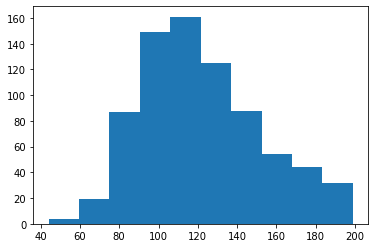

In [17]:
plt.hist(df['Glucose'])
plt.show()

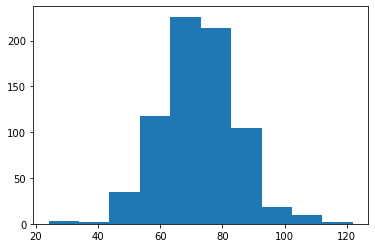

In [18]:
plt.hist(df['BloodPressure'])
plt.show()

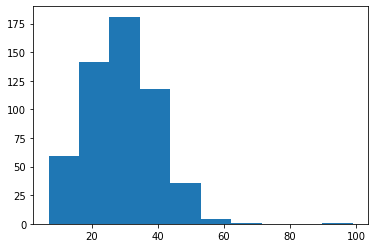

In [19]:
plt.hist(df['SkinThickness'])
plt.show()

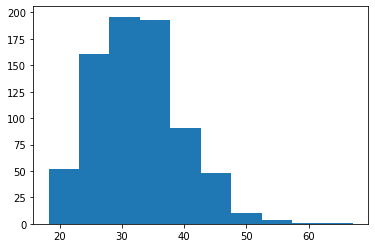

In [20]:
plt.hist(df['BMI'])
plt.show()

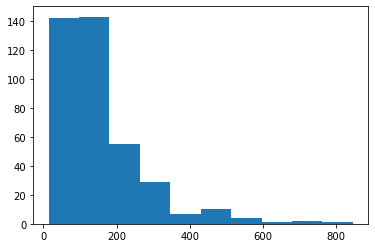

In [21]:
plt.hist(df['Insulin'])
plt.show()

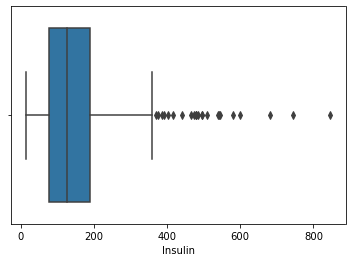

In [22]:
sns.boxplot(df['Insulin'])
plt.show()

<h6>from above distribution we can see few feature like Insulin ,BMI,SkinThickness are righlty skewed, hence we can't use mean because there are outliers present here, i have plotted box chart on one of the feature which is insulin we can see there are outliers present. So traditionally imputing with `mean` is not acceptable we can go for `median` , but i am going with KNNImputer </h6>

<h3>Why use KNN ?</h3>
<b>To fill out the missing values KNN finds out the similar data points among all the features. Then it took the average of all the points to fill in the missing values.</b>

In [23]:
#imputing zero with a KNN
from fancyimpute import KNN
knn_imputer = KNN()
# imputing the missing value with knn imputer
df.iloc[:,:] = knn_imputer.fit_transform(df)

Imputing row 1/768 with 1 missing, elapsed time: 0.248
Imputing row 101/768 with 2 missing, elapsed time: 0.256
Imputing row 201/768 with 1 missing, elapsed time: 0.260
Imputing row 301/768 with 3 missing, elapsed time: 0.268
Imputing row 401/768 with 2 missing, elapsed time: 0.272
Imputing row 501/768 with 0 missing, elapsed time: 0.276
Imputing row 601/768 with 1 missing, elapsed time: 0.280
Imputing row 701/768 with 0 missing, elapsed time: 0.284


In [24]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,162.743255,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,62.914770,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,26.464588,180.726394,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0


In [26]:
#Perform descriptive analysis.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.000000,17.00
Glucose,768.0,121.584935,30.530450,44.000,99.000000,117.000000,141.000000,199.00
BloodPressure,768.0,72.390351,12.212685,24.000,64.000000,72.000000,80.000000,122.00
SkinThickness,768.0,29.123094,9.496809,7.000,22.919593,29.085087,35.000000,99.00
Insulin,768.0,153.843883,99.614837,14.000,88.000000,132.218586,188.904879,846.00
BMI,768.0,32.433551,6.885187,18.200,27.500000,32.150000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.000000,1.00


<b>3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.</b> 

In [27]:
int_columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','Age','Outcome']
df[int_columns] = df[int_columns].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int32  
 1   Glucose                   768 non-null    int32  
 2   BloodPressure             768 non-null    int32  
 3   SkinThickness             768 non-null    int32  
 4   Insulin                   768 non-null    int32  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int32  
 8   Outcome                   768 non-null    int32  
dtypes: float64(2), int32(7)
memory usage: 33.1 KB


In [28]:
df.dtypes.value_counts()

int32      7
float64    2
dtype: int64

In [29]:
df.dtypes.map(str)

Pregnancies                   int32
Glucose                       int32
BloodPressure                 int32
SkinThickness                 int32
Insulin                       int32
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int32
Outcome                       int32
dtype: object

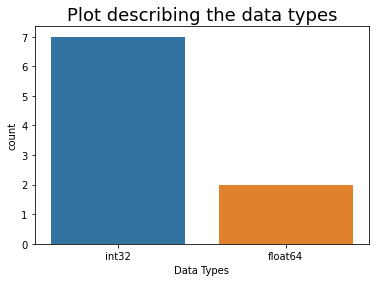

In [30]:
sns.countplot(df.dtypes.map(str))
plt.title('Plot describing the data types',fontsize=18)
plt.xlabel('Data Types')
plt.show()

<h2>Project Task: Week 2</h2>

Data Exploration:

<b>1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.</b>

In [31]:
diabetic_positive = df[df['Outcome'] == 1]
diabetic_negative = df[df['Outcome'] == 0]

In [32]:
diabetic_positive.shape

(268, 9)

In [33]:
diabetic_negative.shape

(500, 9)

In [1]:
ax = sns.countplot(df['Outcome'])
for p in ax.patches:
    ax.annotate(format(p.get_height()) , (p.get_x()+0.35 , p.get_height()+5),fontsize=10)
plt.show()

NameError: name 'sns' is not defined

when it comes to classification problem, we must have balance dataset, If our dataset is imbalanced.

Imbalanced data refers to those types of datasets where the target class has an uneven distribution
of observation, i.e one class label has a very high number of observations and the other has a
very low number of observations. Main problem with imbalanced dataset prediction is how accurately
are we actually predicitng both majority and minority class

Here, outcome variable is in the ratio of 2:1 , this means our data is imbalanced, thus we may need to
handle it using Resampling (Oversampling and Undersampling)

<b>2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.</b>

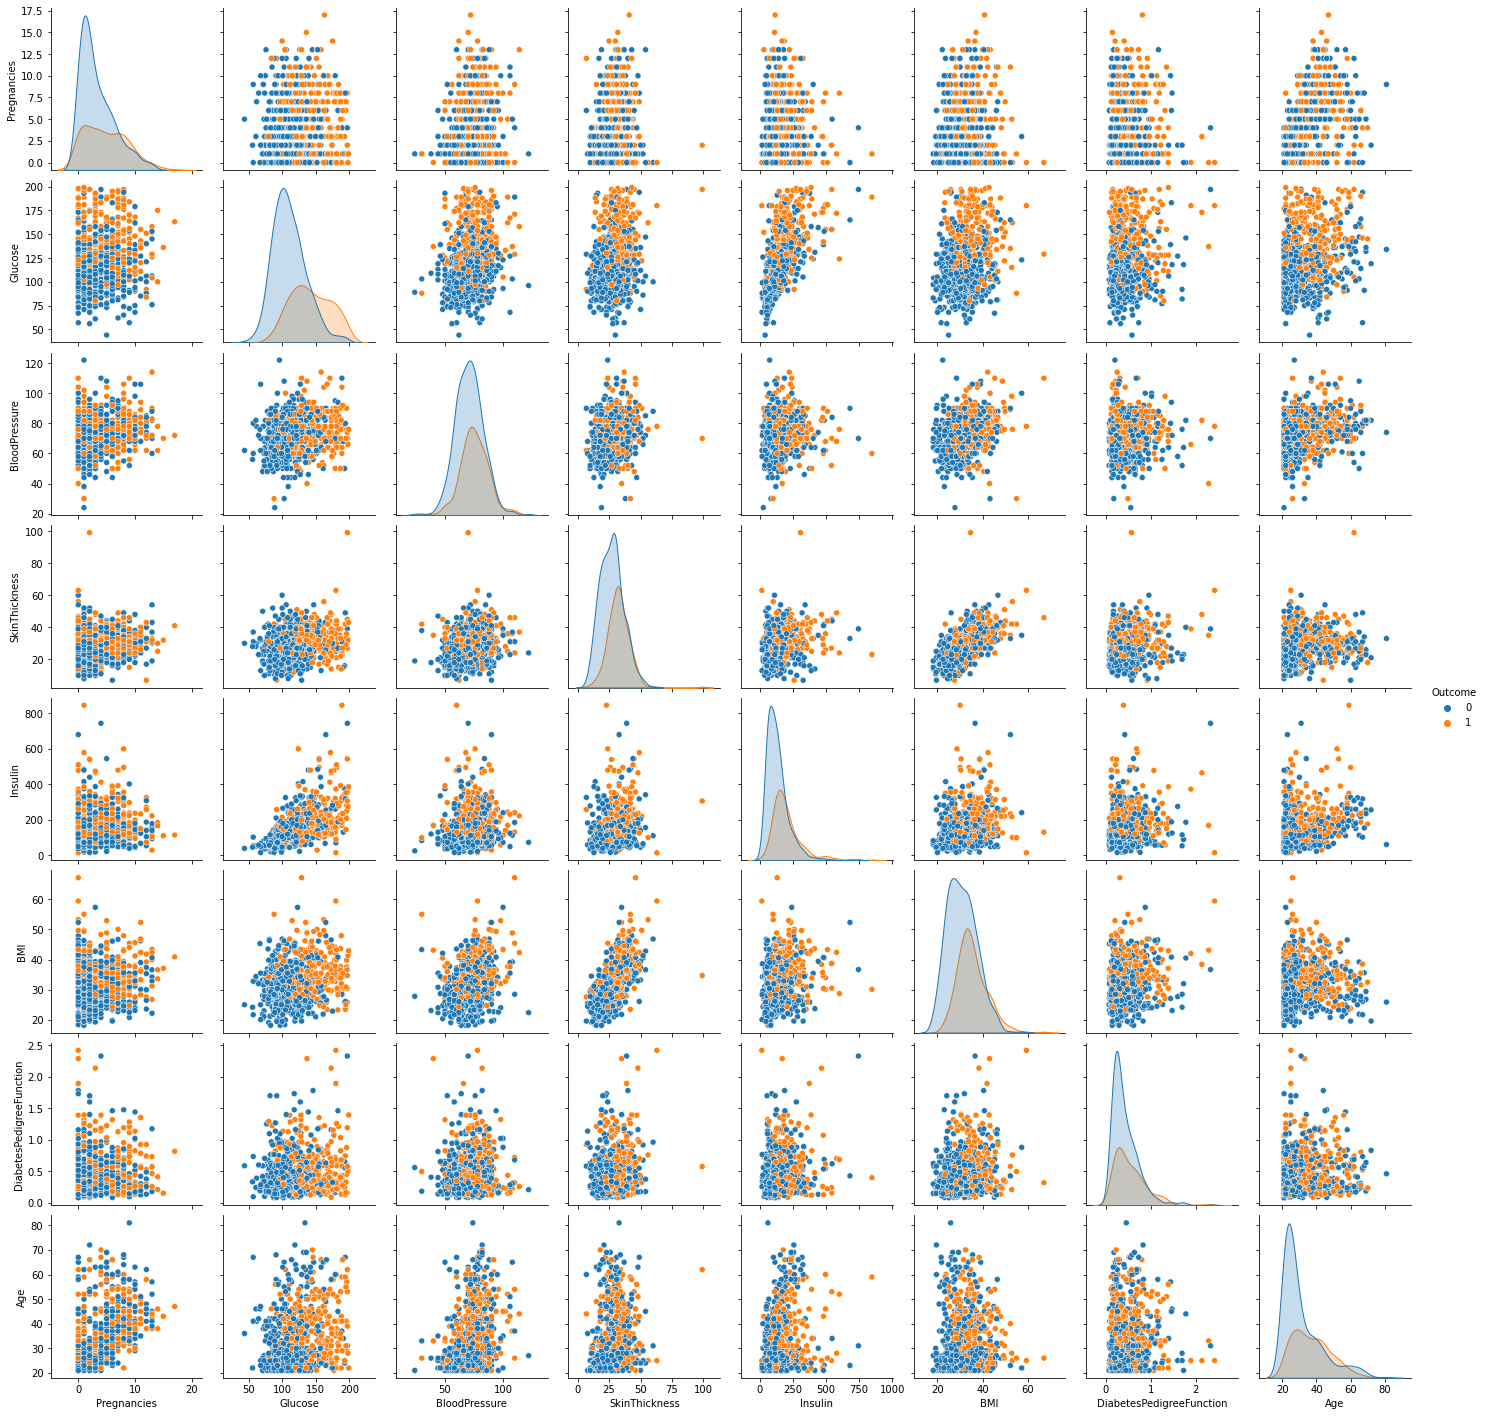

In [35]:
sns.pairplot(df, hue ='Outcome')
plt.show()

we have some interesting observations from above scatter plot of pairs of features: <br/>
• Glucose alone is impressively good to distinguish between the Outcome classes. <br/>
• Age alone is also able to distinguish between classes to some extent. <br/>
• It seems none of pairs in the dataset is able to clearly distinguish between the outcome classes.

<b>3. Perform correlation analysis. Visually explore it using a heat map.</b>

In [36]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.132141,0.219453,0.101791,0.060221,0.024370,-0.033523,0.544341,0.221898
Glucose,0.132141,1.000000,0.234005,0.246956,0.623280,0.237932,0.139849,0.270998,0.496482
BloodPressure,0.219453,0.234005,1.000000,0.222251,0.134063,0.295707,0.005336,0.337514,0.176261
SkinThickness,0.101791,0.246956,0.222251,1.000000,0.238063,0.642264,0.114277,0.142845,0.277998
Insulin,0.060221,0.623280,0.134063,0.238063,1.000000,0.249952,0.135248,0.238472,0.320056
BMI,0.024370,0.237932,0.295707,0.642264,0.249952,1.000000,0.153889,0.027557,0.314564
DiabetesPedigreeFunction,-0.033523,0.139849,0.005336,0.114277,0.135248,0.153889,1.000000,0.033561,0.173844
Age,0.544341,0.270998,0.337514,0.142845,0.238472,0.027557,0.033561,1.000000,0.238356
Outcome,0.221898,0.496482,0.176261,0.277998,0.320056,0.314564,0.173844,0.238356,1.000000


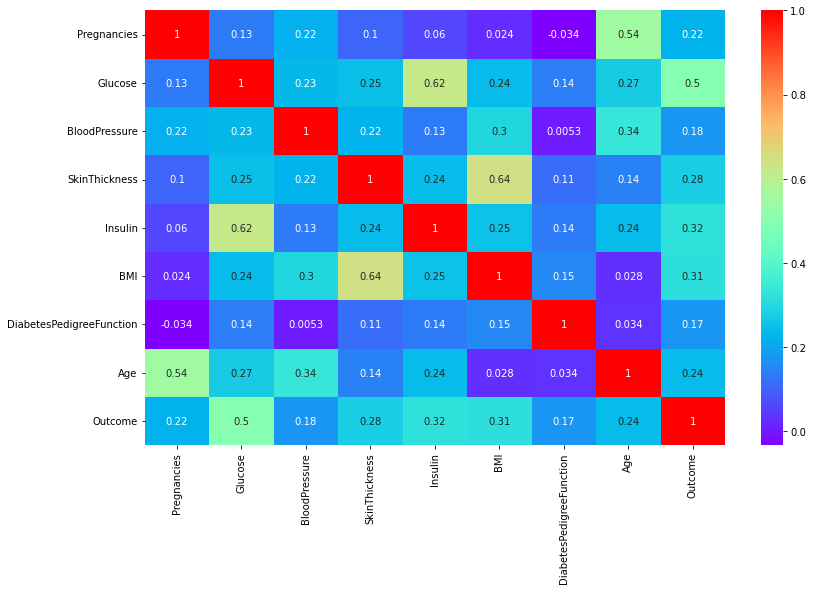

In [37]:
#Visually explore it using a heat map.
plt.subplots(figsize=(13,8))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')
plt.show()

It appears from correation matrix and heatmap that there exists significant correlation between some pairs such as - <br>
• Age-pregnancies<br> 
• BMI-SkinThickness <br/>
• Insulin - Glucose

<h2>Project Task: Week 3 </h2>

<b>Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.</b>

In [38]:
#install
!pip install imblearn

<b>What approach i will follow below<b>
1. First train-test split dataset , on train dataset will do oversampling because leaving the testing data in its original distribution in order to get a valid approximation of how our model will perform on the original data
2. Then will apply classification models

In [39]:
#seperate a dataset feature and target
X = df.drop(columns='Outcome')
X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,162,33.6,0.627,50
1,1,85,66,29,62,26.6,0.351,31


In [40]:
Y = df.Outcome
Y.head(2)

0    1
1    0
Name: Outcome, dtype: int32

In [41]:
#train-test-split dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=100,test_size=0.3)

In [42]:
#I'm using SMOTE(Synthetic Minority Over-sampling Technique) to achieve a balance
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=1,random_state=42)
X_sample,Y_sample = sm.fit_resample(X_train,Y_train)

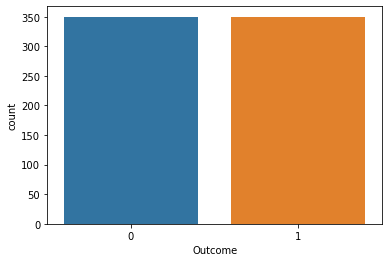

In [43]:
#now we have balanced our diabetes positive and negative by oversampling technique
ax = sns.countplot(Y_sample)

In [44]:
#before making model to predict , let's first standardize our dataset using Standard scalar
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_sample)
X_train_ss_temp = ss.transform(X_sample)

In [45]:
X_train_ss = pd.DataFrame(X_train_ss_temp,columns=X_sample.columns)
X_train_ss.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.968168,0.832416,1.267610,1.675201,0.905438,2.557515,-0.418082,0.195699
1,-0.907434,0.310028,0.066084,2.352441,0.375476,0.689488,-0.227103,-0.892958
2,-1.220035,0.146782,-0.363032,1.449455,0.337621,1.549373,-0.624462,-0.711515
3,1.280769,-0.049114,1.954196,-0.582265,0.224058,0.194460,-0.741514,1.828685
4,-0.594834,-0.604151,-1.822028,-0.356518,-0.958894,-0.036968,-0.476608,-1.074401


In [46]:
X_test_ss = pd.DataFrame(ss.transform(X_test),columns=X_test.columns)

Now both train and test dataset have been standardize , let's first build an KNNClassifier [KNeighborsClassifier]

Before Starting setting rule : 
1. Precision : out of all positive prediction how many i got it right. In this FP should be low . In order to get good Precision
2. Recall : out of all postive how many i got it right , in this FN should be low. In order to get good recall

The above Precision and Recall will use to write my desciption and model which we will choose based on `1` that is +ve diabetic patient

<b>KNN</b>

<b>Finding best K values by choosing which have less error rate</b>

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_ss,Y_sample)
    pred_i = knn.predict(X_test_ss)
    error_rate.append(np.mean(pred_i != Y_test))    

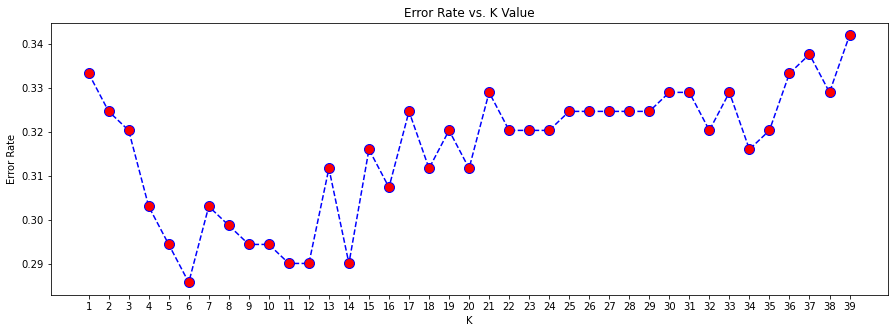

In [49]:
plt.figure(figsize=(15,5))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xticks(range(1,40))
plt.show()

We can see that neighbors 6 have less error rate , so i am going with 6 neighbors

In [50]:
#Using KNN
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_ss,Y_sample)
pred = knn.predict(X_test_ss)

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(Y_test,pred))
print('\n')
print(classification_report(Y_test,pred))

[[111  39]
 [ 27  54]]


              precision    recall  f1-score   support

           0       0.80      0.74      0.77       150
           1       0.58      0.67      0.62        81

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.73      0.71      0.72       231



Accuracy is 71, but in classification problem precision and recall is more important than accuracy because one of the reason would be imbalance dataset but we have balaced our dataset by imputing or its able to predict one class 90% accurate and other only 10%. <br/>
In here we are predicting the patient is postive , we need to keep our FN as low as possible<br/>      
For class 1 , f1 score is 0.62 [Balance btw precision and recall] which is ok not great <br>
              precision is 0.58 [out of all predicted positive i got only 58% right that this patient is diabetic, which is really bad that means our FP is high but its okay because it wont harm much patient will eventually know he is not diabetic] <br>
              Recall is 0.67 [out of all positive truth i got 67% right that this patient is diabetic, which is good not great but in terms of medical view its bad, because FN is high, patient is diabetic but our model predicting he is not diabetic] 

<b>Logisitc regression</b>

In [52]:
#Using Logisitc regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_ss,Y_sample)
pred_lr = lr.predict(X_test_ss)

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(Y_test,pred_lr))
print('\n')
print(classification_report(Y_test,pred_lr))

[[110  40]
 [ 28  53]]


              precision    recall  f1-score   support

           0       0.80      0.73      0.76       150
           1       0.57      0.65      0.61        81

    accuracy                           0.71       231
   macro avg       0.68      0.69      0.69       231
weighted avg       0.72      0.71      0.71       231



Accuracy is 71, but in classification problem precision and recall is more important than accuracy because one of the reason would be imbalance dataset but we have balaced our dataset by imputing or its able to predict one class 90% accurate and other only 10% <br/>
In here we are predicting the patient is postive , we need to keep our FN as low as possible<br/>      
For class 1 , f1 score is 0.61 [Balance btw precision and recall] which is good <br/>
              precision is 0.57 [out of all predicted positive i got only 57% right that this patient is diabetic, 
which is really bad that means our FP is high but its okay because it wont harm much patient will eventually know 
                                 he is not diabetic] <br/>
              Recall is 0.65 [out of all positive truth i got 65% right that this patient is diabetic, 
which is good not great but in terms of medical view its bad, because FN is high, patient is diabetic 
                              but our model predicting he is not diabetic] 

<b>RandomForest</b>

In [100]:
#Using RandomForest
from sklearn.ensemble import RandomForestClassifier

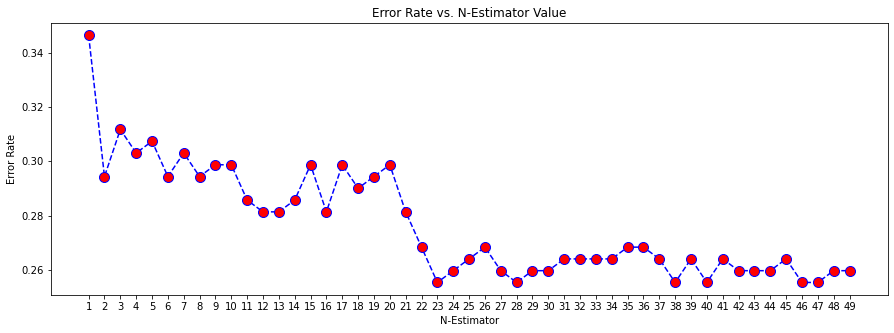

In [101]:
#first we need to find the optimal n_estimators
error_rate_rfc = []

for i in range(1,50):
    rfc_f = RandomForestClassifier(n_estimators=i,random_state=100)
    rfc_f.fit(X_train_ss,Y_sample)
    pred_i = rfc_f.predict(X_test_ss)
    error_rate_rfc.append(np.mean(pred_i != Y_test))    
    
plt.figure(figsize=(15,5))
plt.plot(range(1,50),error_rate_rfc,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. N-Estimator Value')
plt.xlabel('N-Estimator')
plt.ylabel('Error Rate')
plt.xticks(range(1,50))
plt.show()

In [103]:
#Going with 23 Estimators
rfc = RandomForestClassifier(n_estimators=23,random_state=100)
rfc.fit(X_train_ss,Y_sample)
pred_rfc = rfc.predict(X_test_ss)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(Y_test,pred_rfc))
print('\n')
print(classification_report(Y_test,pred_rfc))

[[113  37]
 [ 22  59]]


              precision    recall  f1-score   support

           0       0.84      0.75      0.79       150
           1       0.61      0.73      0.67        81

    accuracy                           0.74       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.74      0.75       231



Accuracy is 74, but in classification problem precision and recall is more important than accuracy because one of the reason would be imbalance dataset but we have balaced our dataset by imputing or its able to predict one class 90% accurate and other only 10%<br/>
In here we are predicting the patient is postive , we need to keep our FN as low as possible<br/>      
For class 1 , f1 score is 0.67 [Balance btw precision and recall] which is ok not great <br>
              precision is 0.61 [out of all predicted positive i got 61% right that this patient is diabetic, 
which is fine that means our FP is not much high but its okay because it wont harm much patient will eventually know 
                                 he is not diabetic] <br>
              Recall is 0.73 [out of all positive truth i got 73% right that this patient is diabetic, 
which is great as per other above models ,In terms of medical view its fine, In this FN is is about 30% out of 100%] 

<b>SVC</b>

In [92]:
#Using SVC
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf', gamma='auto',probability=True,random_state=100)  
svclassifier.fit(X_train_ss, Y_sample)

# Prediction and Evaluation
pred_svc = svclassifier.predict(X_test_ss)  

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_test, pred_svc))  
print(classification_report(Y_test, pred_svc))

[[106  44]
 [ 23  58]]
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       150
           1       0.57      0.72      0.63        81

    accuracy                           0.71       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.73      0.71      0.72       231



Accuracy is 71, but in classification problem precision and recall is more important than accuracy because one of the reason would be imbalance dataset but we have balaced our dataset by imputing or its able to predict one class 90% accurate and other only 10%<br/>
In here we are predicting the patient is postive , we need to keep our FN as low as possible<br/>      
For class 1 , f1 score is 0.63 [Balance btw precision and recall] which is ok not great <br>
              precision is 0.57 [out of all predicted positive i got 57% right that this patient is diabetic, 
which is not great that means our FP is high but its okay because it wont harm much patient will eventually know 
                                 he is not diabetic] <br>
              Recall is 0.72 [out of all positive truth i got 72% right that this patient is diabetic, 
which is great as per first 2 above models ,In terms of medical view its fine, In this FN is about 30% out of 100%] 

IF we comapre KNN with other 3 models [will compare with recall because patient being diabetic and predicting he is not its bad]
1. KNN VS Logistic Regression : based on recall on patient being diabetic , KNN 0.67 recall is slightly better than LR model 0.65
2. KNN VS Random FOrest : based on recall on patient being diabetic , Random Forest model 0.73 recall is better than KNN 0.67 
3. KNN VS SVC :  based on recall on patient being diabetic , SVC model 0.72 recall is better than KNN 0.67 

If i have to choose , i will Random Forest because recall is good for positive patient than other models

<h2>Project Task: Week 4</h2><br/>
<b>
Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. <br/>
Please be descriptive to explain what values of these parameter you have used.</b>

<b>SVC</b>

In [58]:
#SVC
proba_svc = svclassifier.predict_proba(X_test_ss)
# keep probabilities for the positive outcome only
proba_svc = proba_svc[:,1]

<b>Print AUROC scores</b>

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve
svc_roc_auc_score = roc_auc_score(Y_test, proba_svc)
print('SVC: AUROC = %.3f' % (svc_roc_auc_score))

SVC: AUROC = 0.770


<b>Calculate ROC curve</b>

In [60]:
svc_fpr,svc_tpr,svc_thresholds = roc_curve(Y_test,proba_svc)

<b>Calculate PR Curve</b>

In [67]:
svc_precision, svc_recall, svc_pr_thresholds = precision_recall_curve(Y_test,proba_svc)

<b>KNN</b>

In [61]:
#KNN
knn_proba = knn.predict_proba(X_test_ss)
knn_proba = knn_proba[:,1]
from sklearn.metrics import roc_auc_score,roc_curve
knn_roc_auc_score = roc_auc_score(Y_test,knn_proba)
knn_roc_auc_score

0.7422633744855968

In [68]:
knn_fpr,knn_tpr,knn_thresholds = roc_curve(Y_test,knn_proba)
knn_precision, knn_recall, knn_pr_thresholds = precision_recall_curve(Y_test,knn_proba)

<b>Logistic Regression</b>

In [69]:
lr_proba = lr.predict_proba(X_test_ss)
lr_proba = lr_proba[:,1]
from sklearn.metrics import roc_auc_score,roc_curve
lr_roc_auc_score = roc_auc_score(Y_test,lr_proba)
print(lr_roc_auc_score)
lr_fpr,lr_tpr,lr_thresholds = roc_curve(Y_test,lr_proba)
lr_precision, lr_recall, lr_pr_thresholds = precision_recall_curve(Y_test,lr_proba)

0.80559670781893


<b>RandomForest</b>

In [70]:
rfc_proba = rfc.predict_proba(X_test_ss)
rfc_proba = rfc_proba[:,1]
from sklearn.metrics import roc_auc_score,roc_curve
rfc_roc_auc_score = roc_auc_score(Y_test,rfc_proba)
print(rfc_roc_auc_score)
rfc_fpr,rfc_tpr,rfc_thresholds = roc_curve(Y_test,rfc_proba)
rfc_precision, rfc_recall, rfc_pr_thresholds = precision_recall_curve(Y_test,rfc_proba)

0.7738271604938272


<h2>ROC Curve</h2>

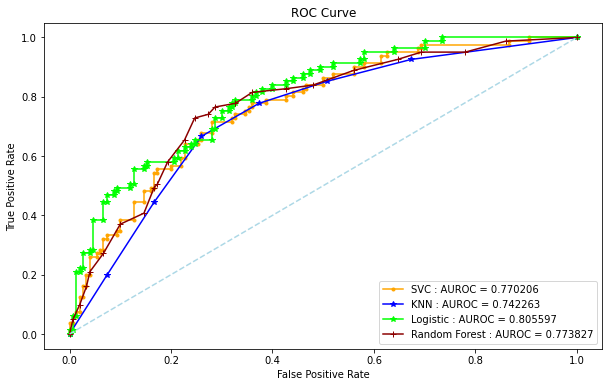

In [65]:
plt.figure(figsize=(10,6))
plt.plot(svc_fpr,svc_tpr,marker = '.',label='SVC : AUROC = %3f'%(svc_roc_auc_score),color='orange')
plt.plot(knn_fpr,knn_tpr,marker='*',label='KNN : AUROC = %3f'%(knn_roc_auc_score),color='blue')
plt.plot(lr_fpr,lr_tpr,marker='*',label='Logistic : AUROC = %3f'%(lr_roc_auc_score),color='lime')
plt.plot(rfc_fpr,rfc_tpr,marker='+',label='Random Forest : AUROC = %3f'%(rfc_roc_auc_score),color='darkred')
plt.plot([0,1],[0,1],linestyle='dashed',color='lightblue')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Logistic Regression also looks good, but in our case our focus is FN be less so we will go with Random Forest
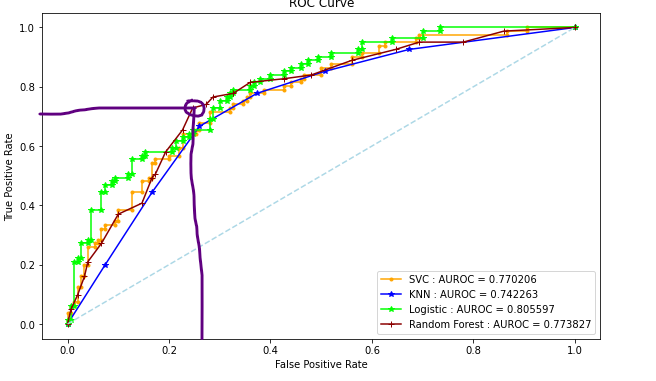

<h2>PR Curve</h2>

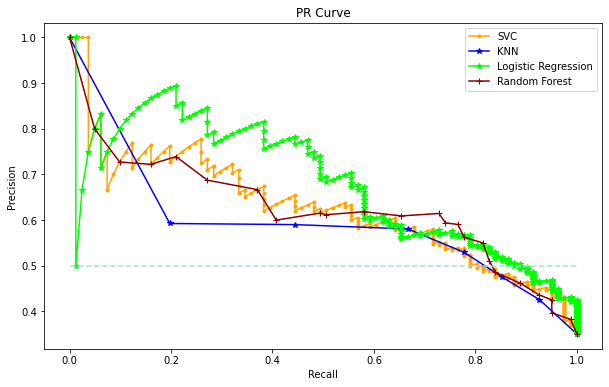

In [105]:
plt.figure(figsize=(10,6))
plt.plot(svc_recall,svc_precision,marker = '.',color='orange',label='SVC')
plt.plot(knn_recall,knn_precision,marker='*',color='blue',label='KNN')
plt.plot(lr_recall,lr_precision,marker='*',color='lime',label='Logistic Regression')
plt.plot(rfc_recall,rfc_precision,marker='+',color='darkred',label='Random Forest')
plt.plot([0, 1], [0.5, 0.5], linestyle='--',color='lightblue')
plt.title('PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

<b>Tableau Link : https://public.tableau.com/app/profile/nitin8051/viz/CapstoneHealthCare-2022/Dashboard1?publish=yes</b>